In [1]:
import importlib
%matplotlib inline
import matplotlib.pyplot as plt

import src
from src.utils import *
from src.data import *
from src.simulation import *

[nltk_data] Downloading package stopwords to /Users/shim-
[nltk_data]     kojio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
importlib.reload(src.lda)
from src.lda import *
importlib.reload(src.utils)
from src.utils import *

importlib.reload(src.simulation)
from src.simulation import *

### simulating iter times (Each iter has num_simulations simulations.)

In [3]:
n_iter = 3
num_topics = 20
num_simulations = 100

In [ ]:
for i in tqdm(range(n_iter)):
    print()
    s = Simulator(model_type="lda",num_topics=num_topics,num_silulations=num_simulations,num_iter=i)
    s.generate_docs(is_output=True,doc_args={"min_words": 50,"max_words": 100,"num_docs": 5000,"voc_size": 1000})
    s.estimate_distributions(is_output=True)
    print("--- iter {} has completed ---".format(i))


### matching the topic between two matrices (true and estimated) by Hungarian algorithm
1. the column of doc-topic matrix
2. the row of topic-word matrix

- by cosine similarity
- by correlation coefficient



#### by cosine similarity

In [4]:
cs_corres_num_topic_dict = matching_topic(
    score_method="cossim", dist_type="doc_topic",specific_iter=0, num_simulations=num_simulations
)

#### by correlation coefficient

In [5]:
cc_corres_num_topic_dict = matching_topic(
    score_method="correlation", dist_type="doc_topic",specific_iter=0, num_simulations=num_simulations
)

### drawing the topic model performance
- by cosine similarity
- by correlation coefficient
- by top10 keywords

#### by cosine similarity

In [25]:
df_cossim = calculate_score(
    score_type="cossim",
    specific_iter=0,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

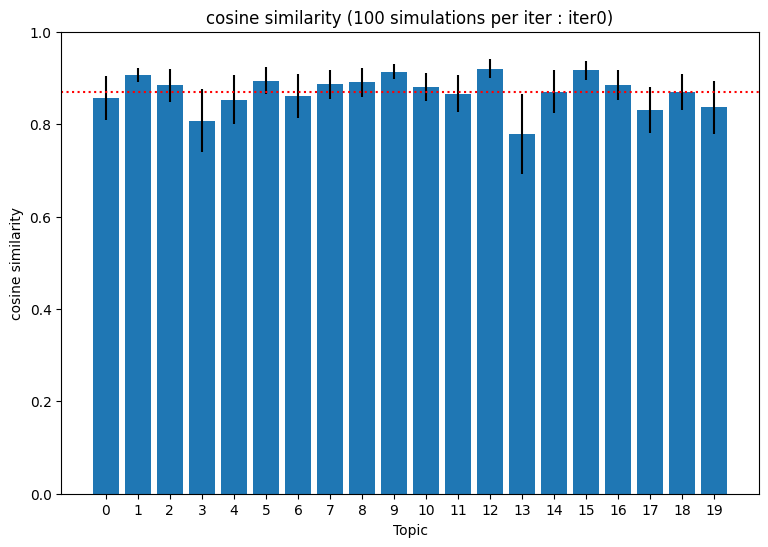

In [34]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
cossim_mean = df_cossim.mean()
cossim_var = df_cossim.var()
ax.bar(x, cossim_mean, yerr=cossim_var)
ax.axhline(cossim_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("cosine similarity")
ax.set_title("cosine similarity ({} simulations per iter : iter{})".format(num_simulations,0))
plt.savefig("../../dt_cossim.png")
plt.show()

#### by correlation coefficient

In [27]:
df_corr = calculate_score(
    score_type="correlation",
    specific_iter=0,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

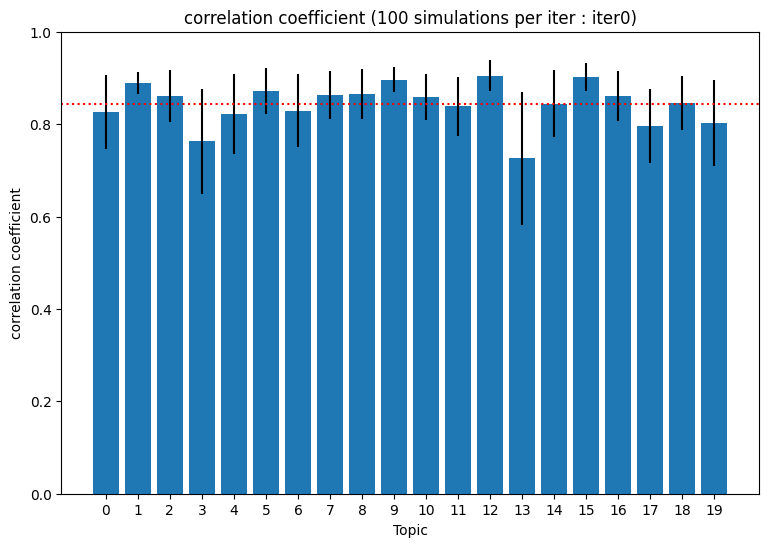

In [33]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
correlation_mean = df_corr.mean()
correlation_var = df_corr.var()
ax.bar(x, correlation_mean, yerr=correlation_var)
ax.axhline(correlation_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("correlation coefficient")
ax.set_title("correlation coefficient ({} simulations per iter : iter{})".format(num_simulations,0))
plt.savefig("../../dt_correlation.png")
plt.show()

#### keywords

In [29]:
df_keywords = calculate_score(
    score_type="keywords",
    specific_iter=0,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

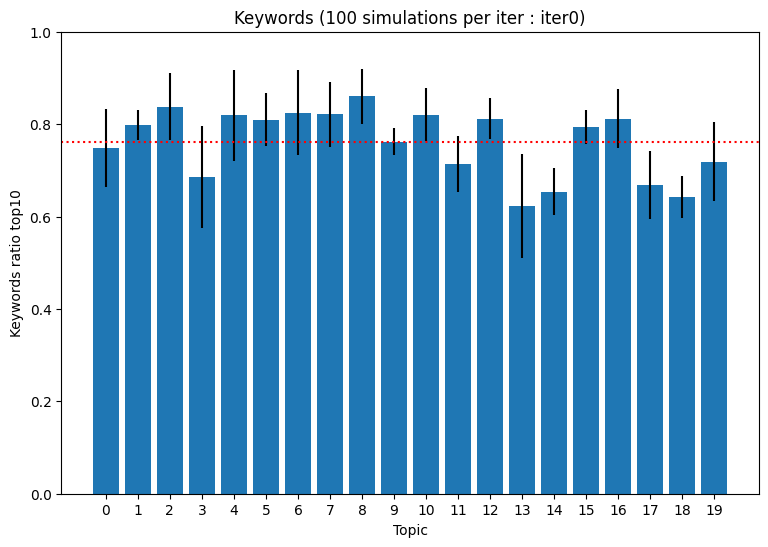

In [35]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
key_mean = df_keywords.mean()
key_var = df_keywords.var()
ax.bar(x, key_mean, yerr=key_var)
ax.axhline(key_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1.0)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Keywords ratio top10")
ax.set_title("Keywords ({} simulations per iter : iter{})".format(num_simulations,0))
plt.savefig("../../dt_10keyword.png")
plt.show()

#### Euclid distance

In [31]:
df_euclid = calculate_score(
    score_type="euclid",
    specific_iter=0,
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

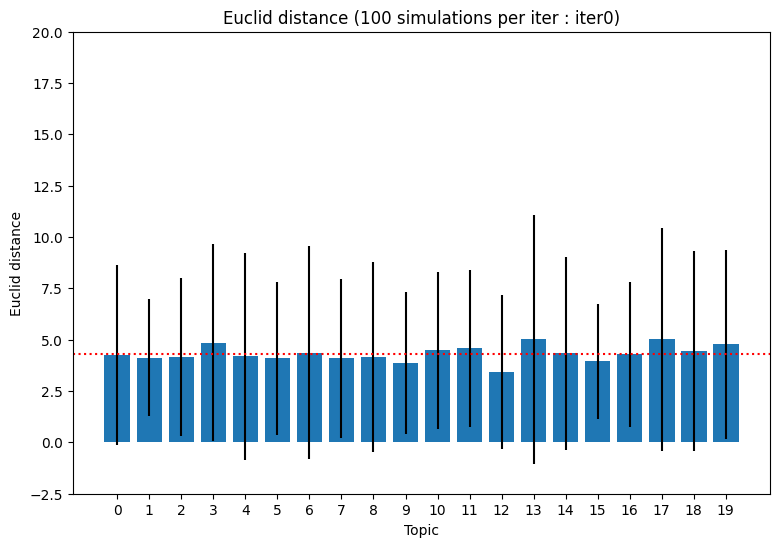

In [36]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
euclid_mean = df_euclid.mean()
euclid_var = df_euclid.var()
ax.bar(x, euclid_mean, yerr=euclid_var)
ax.axhline(euclid_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(-2.5, 20)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Euclid distance")
ax.set_title("Euclid distance ({} simulations per iter : iter{})".format(num_simulations,0))
plt.savefig("../../dt_distance.png")
plt.show()